In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler as sds
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [22]:
df_raw = pd.read_csv("rawdata/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


### Distinct 한 값의 수 : 범주형 데이터의 unique한 값을 알고자 하는 이유 

In [23]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols:
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

CHURN : 2
CUSTOMER_ID : 930
GENDER : 2
CHARGE_TYPE : 5
HANDSET : 11
USAGE_BAND : 6


In [24]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)


In [25]:
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [26]:
df_raw["CHURN"].value_counts()

0    750
1    180
Name: CHURN, dtype: int64

In [27]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print("train data size\t: {}".format(df_train.shape))
print("test data size\t: {}".format(df_test.shape))

train data size	: (651, 15)
test data size	: (279, 15)


In [28]:
for i in list(df_raw):
    print (i, end = " + ")

CHURN + CUSTOMER_ID + GENDER + AGE + CHARGE_TYPE + HANDSET + USAGE_BAND + SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME + 

In [29]:
log_model = Logit.from_formula("""CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + 
SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + 
WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME""", df_train)


In [30]:
log_result = log_model.fit()

         Current function value: 0.253230
         Iterations: 35


/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [31]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.5059
Time:                        14:17:37   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
                                        LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -24.1056   2065.436     -0.012      0.991   -4072.286    4024.075
C(GENDER)[T.M]                -0.4510      0.315     -1.433      0.152      -1.068 

In [32]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

530    0
534    0
699    0
641    0
319    0
dtype: int64

In [33]:
print("Accuracy: %.3f \n" % accuracy_score(df_test["CHURN"], y_pred_class))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["CHURN"], y_pred_class)))

Accuracy: 0.914 

Confusion Matrix:
[[227   8]
 [ 16  28]]


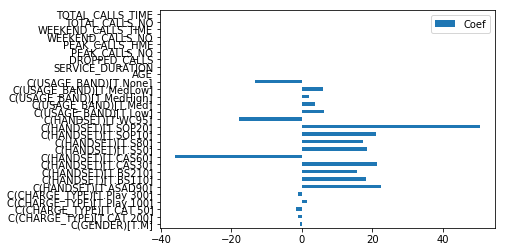

In [34]:
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

In [35]:
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

scaler = sds()
np_numeric_scaled = scaler.fit_transform(df_numeric) # 여기 트랜스폼 왜 해준거지..?
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
df_char 

,CUSTOMER_ID,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,K102990,F,CAT 100,ASAD170,Med
1,K103280,M,CAT 100,S50,Med
2,K103660,M,CAT 100,ASAD170,Med
3,K103730,M,CAT 100,ASAD170,Med
4,K104560,F,CAT 100,S50,Med
5,K105530,M,CAT 100,S80,Med
6,K106210,F,CAT 100,ASAD170,Med
7,K106350,M,CAT 100,ASAD170,Med
8,K106570,F,CAT 100,S50,Med
9,K107570,F,CAT 100,ASAD170,Med


In [37]:
df_numeric

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0
5,0,51,49.43,3,289,486.6,1,31.8,427,903.3
6,0,30,32.30,6,427,729.6,12,52.8,490,907.2
7,0,36,54.87,2,522,801.6,0,0.0,558,884.7
8,0,43,11.23,0,156,516.6,8,84.0,362,987.6
9,0,50,49.97,0,136,466.2,13,31.8,186,632.7


In [38]:
np_numeric_scaled

array([[-0.48989795, -0.03060434, -0.06995826, ..., -0.75502385,
         0.07901531, -0.78388043],
       [-0.48989795, -0.3358273 , -0.24345098, ..., -0.57961429,
         0.25916299, -0.45826047],
       [-0.48989795, -0.3358273 ,  1.06338646, ..., -1.3470311 ,
        -0.32531615, -0.81735709],
       ...,
       [ 2.04124145,  0.12200713,  0.74813749, ...,  0.48928769,
         0.99977013, -0.04007663],
       [ 2.04124145, -0.48843878,  0.43077276, ..., -1.3470311 ,
         1.05181279,  0.23304169],
       [ 2.04124145, -0.10691008, -0.20113568, ...,  1.66233909,
         0.08301859, -0.19008133]])

In [44]:
df_numeric_scaled

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.489898,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880
1,-0.489898,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260
2,-0.489898,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357
3,-0.489898,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795
4,-0.489898,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610
5,-0.489898,1.495510,1.065502,0.092147,0.280786,-0.410134,-0.931493,-0.475465,0.323216,-0.288316
6,-0.489898,-0.106910,-0.142600,0.949112,0.890358,0.061355,-0.245052,0.100098,0.575422,-0.281182
7,-0.489898,0.350924,1.449161,-0.193508,1.309991,0.201056,-0.993897,-1.347031,0.847645,-0.322342
8,-0.489898,0.885065,-1.628572,-0.764818,-0.306700,-0.351926,-0.494667,0.955219,0.063002,-0.134104
9,-0.489898,1.419205,1.103586,-0.764818,-0.395044,-0.449716,-0.182648,-0.475465,-0.641575,-0.783332


In [46]:
df_scaled["CHURN"] = np.where(df_scaled["CHURN"]> 0, 1, 0)
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,K102990,F,CAT 100,ASAD170,Med
1,0,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,K103280,M,CAT 100,S50,Med
2,0,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,K103660,M,CAT 100,ASAD170,Med
3,0,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,K103730,M,CAT 100,ASAD170,Med
4,0,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,K104560,F,CAT 100,S50,Med


In [47]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [48]:
scaled_log_model = Logit.from_formula("""CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + 
SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + 
WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME""", df_scaled_train)

scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.5059
Time:                        14:19:35   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
                                        LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -22.6857   2065.401     -0.011      0.991   -4070.798    4025.427
C(GENDER)[T.M]   

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


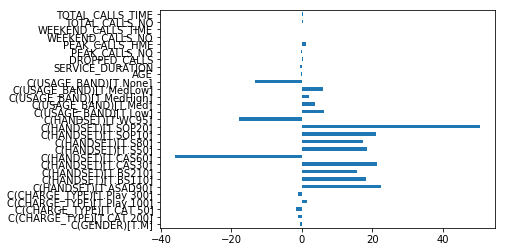

In [49]:
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)
